# **Gene Expression Analysis Using Deep Learning**


## Dataset Preprocessing

In [1]:
# first we are downloading the dataset from the GDC (from USC specific website which has focused UCEC dataset)
# hosting the dataset to box so no need to reupload every session
!wget -O TCGA-UCEC.star_tpm.tsv.gz "https://utdallas.box.com/shared/static/e2ncuey8m6ats99dm2jajpbu5helr8wi.gz"
!file TCGA-UCEC.star_tpm.tsv.gz

# unzipping the file in google colab
# when running for the first time, answer yes to the question "do you wish to overwrite (y or n)?"
# can say n every time after that!
!gunzip TCGA-UCEC.star_tpm.tsv.gz
!ls

--2024-11-25 04:40:31--  https://utdallas.box.com/shared/static/e2ncuey8m6ats99dm2jajpbu5helr8wi.gz
Resolving utdallas.box.com (utdallas.box.com)... 74.112.186.157
Connecting to utdallas.box.com (utdallas.box.com)|74.112.186.157|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/e2ncuey8m6ats99dm2jajpbu5helr8wi.gz [following]
--2024-11-25 04:40:31--  https://utdallas.box.com/public/static/e2ncuey8m6ats99dm2jajpbu5helr8wi.gz
Reusing existing connection to utdallas.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://utdallas.app.box.com/public/static/e2ncuey8m6ats99dm2jajpbu5helr8wi.gz [following]
--2024-11-25 04:40:32--  https://utdallas.app.box.com/public/static/e2ncuey8m6ats99dm2jajpbu5helr8wi.gz
Resolving utdallas.app.box.com (utdallas.app.box.com)... 74.112.186.157
Connecting to utdallas.app.box.com (utdallas.app.box.com)|74.112.186.157|:443... connected.
HTTP request sent, awaiting respo

### Loading Data

In [3]:
import pandas as pd

# then we are loading the TSV file that has all of the project values separated by tabs
file_name = 'TCGA-UCEC.star_tpm.tsv'
data = pd.read_csv(file_name, sep='\t')

# here we are showing the first five rows of the database to see what they look like
data.head()

,Ensembl_ID,TCGA-FI-A3PX-01A,TCGA-BG-A221-01A,TCGA-EY-A1GK-01A,TCGA-BG-A2AE-01A,TCGA-AX-A1CE-01A,TCGA-DI-A2QY-01A,TCGA-D1-A1O8-01A,TCGA-EY-A3QX-01A,TCGA-DI-A0WH-01A,...,TCGA-E6-A1LX-01A,TCGA-FI-A3PV-01A,TCGA-BG-A0MT-01A,TCGA-EY-A549-01A,TCGA-D1-A1O7-01A,TCGA-AJ-A3NF-01A,TCGA-BK-A0C9-01A,TCGA-AJ-A5DW-01A,TCGA-AP-A05J-01A,TCGA-D1-A103-01A
0,ENSG00000000003.15,6.591445,5.483593,5.569616,5.567250,6.887587,6.642866,3.860665,5.520353,5.337290,...,4.857563,6.407465,6.599611,5.898457,6.209582,6.694986,5.275748,6.882687,5.399168,5.770443
1,ENSG00000000005.6,0.394734,0.000000,0.201759,0.468218,0.921589,0.052138,0.753605,0.301471,0.274888,...,0.129876,0.000000,0.265677,0.052138,0.107956,0.196481,0.142609,0.403377,0.999856,0.107152
2,ENSG00000000419.13,7.515168,6.029596,5.825315,5.738738,6.328880,5.967869,5.306991,5.870520,4.538737,...,6.385633,6.833120,6.355259,6.460367,5.829857,6.632550,4.397789,7.062093,4.534890,5.799124
3,ENSG00000000457.14,2.521955,2.407978,3.249840,2.812087,2.644779,1.747989,2.296604,2.951718,2.766765,...,2.681427,2.693230,3.512012,3.586092,2.153708,2.951327,2.625341,3.244156,1.391383,2.827921
4,ENSG00000000460.17,3.032260,2.382114,1.831999,1.869635,1.788226,1.358678,1.687867,3.251492,1.997220,...,2.395858,2.304044,3.133399,1.629613,1.971038,2.702658,2.339052,3.142479,1.539432,2.166137


### Loading and Normalizing the Dataset

In [4]:
# then we install all of the libraries that we need for this project
!pip install numpy pandas matplotlib

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# we then load the data from the dataset so that the program can access it
file_name = 'TCGA-UCEC.star_tpm.tsv'
data = pd.read_csv(file_name, sep='\t')

# we then drop the features that can potentially cause problems
problematic_features = ['ENSG0000022586.20_PAR_Y', 'ENSG0000022766.21_PAR_X']
data = data.drop(columns=problematic_features, errors='ignore')

# data is transposed so columns become features and rows are each sample
data = data.set_index(data.columns[0]).T

# the data is then normalized with Z-score normalization
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# we then use PCA to reduce dimensionality
pca = PCA(n_components=100)  # Reduce to 100 features
reduced_data = pca.fit_transform(normalized_data)

# next step is to state the the column index for the target variable so we have experiment-dependent
target_column_index = 9
y = data.iloc[:, target_column_index].values

# we then split the reduced data and target variable into the two training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reduced_data, y, test_size=0.2, random_state=42)

print(f"Using column {target_column_index + 1} as the target:")
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# defining a function that we use to calculate all of the metrics (which we later use to analyze whether the model is performing well or not)
def compute_metrics(predictions, actual_values):
    MSE = np.mean((predictions - actual_values) ** 2)
    RMSE = np.sqrt(MSE)
    MAE = np.mean(np.abs(predictions - actual_values))
    SS_res = np.sum((predictions - actual_values) ** 2)
    SS_tot = np.sum((actual_values - np.mean(actual_values)) ** 2)
    R2_score = 1 - (SS_res / SS_tot)
    return MSE, RMSE, MAE, R2_score

Using column 10 as the target:
Training set shape: (468, 100) (468,)
Testing set shape: (117, 100) (117,)


In [5]:
# we then check the shape of the reduced dataset to make sure it won't cause any problems
print("Reduced data shape:", reduced_data.shape)

# then we display the first few rows of the reduced dataset to make sure everything looks as it should
print("First 5 rows of reduced data:")
print(reduced_data[:5])

Reduced data shape: (585, 100)
First 5 rows of reduced data:
[[ 2.22587802e+01  5.30940216e+01  5.04567562e-01 -1.49865021e+01
   3.98940291e+01 -6.62247801e+01  3.86809629e+01 -1.28444348e+01
   1.37011995e+01  3.04665720e+01 -1.86412844e+01  2.13917277e+01
  -8.93495445e+00 -1.07933671e+01 -6.00658499e+00  4.14956337e+00
   6.72306277e+00 -2.33599778e+01  7.23682997e+00 -1.46369011e+01
   1.70605017e+00  1.23874420e+01 -5.16610232e-01 -1.29876840e+01
   1.33690027e+01 -8.19631166e+00 -2.95094633e+00 -9.54328462e+00
  -1.96976928e+00  2.63915933e+01  4.49820404e+00 -5.13970857e+00
   2.30595371e+01 -1.21063786e+01 -6.71608509e+00  1.32816858e+01
  -6.91964339e+00 -3.08441177e+00  3.78416026e+00 -6.05700643e+00
  -2.46057643e+01 -5.10669178e+00  2.07243661e+01  1.02964194e+01
   3.02875222e+01 -9.04092449e+00  6.44855428e+00  8.87688481e+00
   1.61446308e+00 -3.75325820e+01 -1.07334191e+01 -1.59783790e+01
  -1.51622834e+01 -2.45234586e+01  2.91535368e+01  2.07495892e+00
  -1.48110113e+

## Testing and Training

### Training

#### Splitting

#### Initializing Params

In [6]:
# here we are defining the function that sets all of the parameters for the model
def initialize_parameters(layers):
    np.random.seed(42)
    parameters = {}
    for l in range(1, len(layers)):
        parameters[f'W{l}'] = np.random.randn(layers[l], layers[l-1]) * 0.01
        parameters[f'b{l}'] = np.zeros((layers[l], 1))
    return parameters

# then we define the layers which go in the order of the amount of input, then the hidden layers, and finally the output
layers = [100, 64, 32, 1]
parameters = initialize_parameters(layers)

for key, value in parameters.items():
    print(f"{key}: {value.shape}")

W1: (64, 100)
b1: (64, 1)
W2: (32, 64)
b2: (32, 1)
W3: (1, 32)
b3: (1, 1)


#### Forward Propogation

In [7]:
# defining the relu activation function
def relu(Z):
    return np.maximum(0, Z)

# then defining the linear activation function which we use for the output
def linear(Z):
    return Z

# forward propogation function definition which goes through each layer of the network and finally gets the outputs
def forward_propagation(X, parameters, layers):
    cache = {'A0': X.T}  # Transpose X for correct matrix multiplication
    for l in range(1, len(layers)):
        W = parameters[f'W{l}']
        b = parameters[f'b{l}']
        Z = np.dot(W, cache[f'A{l-1}']) + b
        if l == len(layers) - 1:  # Output layer
            A = linear(Z)
        else:
            A = relu(Z)
        cache[f'Z{l}'] = Z
        cache[f'A{l}'] = A
    return cache[f'A{len(layers)-1}'], cache

y_pred, cache = forward_propagation(X_train, parameters, layers)
print("Forward propagation output shape:", y_pred.shape)

Forward propagation output shape: (1, 468)


#### Compute Loss

In [8]:
# this function calculates the loss or the MSE of the model
def compute_loss(y_pred, y_true):
    m = y_true.shape[0]
    return np.sum((y_pred - y_true.reshape(1, -1)) ** 2) / (2 * m)

loss = compute_loss(y_pred, y_train)
print("Initial loss:", loss)

Initial loss: 12.219924819715917


#### Back Propogation

In [9]:
# this is the backward propogation function that calculates all of the gradients and returns them
def backward_propagation(parameters, cache, X, y, layers):
    grads = {}
    m = X.shape[0]
    y = y.reshape(cache[f'A{len(layers)-1}'].shape)

    # Output layer gradient
    dZ = cache[f'A{len(layers)-1}'] - y
    grads[f'dW{len(layers)-1}'] = np.dot(dZ, cache[f'A{len(layers)-2}'].T) / m
    grads[f'db{len(layers)-1}'] = np.sum(dZ, axis=1, keepdims=True) / m

    # Hidden layer gradients
    for l in range(len(layers) - 2, 0, -1):
        dA = np.dot(parameters[f'W{l+1}'].T, dZ)
        dZ = dA * (cache[f'Z{l}'] > 0)
        grads[f'dW{l}'] = np.dot(dZ, cache[f'A{l-1}'].T) / m
        grads[f'db{l}'] = np.sum(dZ, axis=1, keepdims=True) / m

    return grads

grads = backward_propagation(parameters, cache, X_train, y_train, layers)

#### Update Params

In [10]:
# this function allows the user to update the parameters when they're trying to improve their model
def update_parameters(parameters, grads, learning_rate):
    for key in parameters.keys():
        parameters[key] -= learning_rate * grads[f'd{key}']
    return parameters

learning_rate = 0.01
parameters = update_parameters(parameters, grads, learning_rate)

#### Training the Model

In [11]:
# this function is used to actually train the model and get it to perform better over time (with parameter tuning, etc)
def train_model(X, y, layers, learning_rate=0.01, epochs=100):
    parameters = initialize_parameters(layers)
    training_losses = []

    # looking through all epochs
    for epoch in range(epochs):
        y_pred, cache = forward_propagation(X, parameters, layers)
        loss = compute_loss(y_pred, y)
        training_losses.append(loss)
        grads = backward_propagation(parameters, cache, X, y, layers)
        parameters = update_parameters(parameters, grads, learning_rate)

        # printing the training epochs
        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {loss:.4f}")

    return parameters

# training the model with the training data, learning rate, epochs, and architecture
trained_parameters = train_model(X_train, y_train, layers, learning_rate=0.01, epochs=100)

Epoch 1/100, Training Loss: 12.2199
Epoch 11/100, Training Loss: 8.5948
Epoch 21/100, Training Loss: 0.4625
Epoch 31/100, Training Loss: 0.1685
Epoch 41/100, Training Loss: 0.1675
Epoch 51/100, Training Loss: 0.1575
Epoch 61/100, Training Loss: 0.0874
Epoch 71/100, Training Loss: 0.0618
Epoch 81/100, Training Loss: 0.0535
Epoch 91/100, Training Loss: 0.0526
Epoch 100/100, Training Loss: 0.0531


### Testing

#### Evaluating on Test Set

In [12]:
# here we are testing on the test set we have
y_test_pred, _ = forward_propagation(X_test, trained_parameters, layers)
test_loss = compute_loss(y_test_pred, y_test)
print(f"Test Loss: {test_loss:.4f}")

Test Loss: 0.2654


## Analysis

### Predicted vs Actual Values

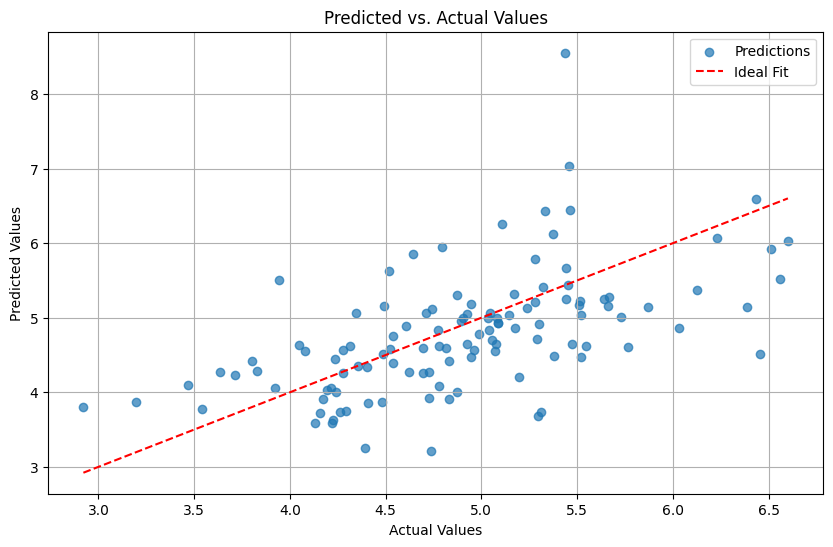

In [13]:
# this graphs the values to show us how they compare, and where the model can do better
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred.flatten(), alpha=0.7, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Fit")
plt.title("Predicted vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

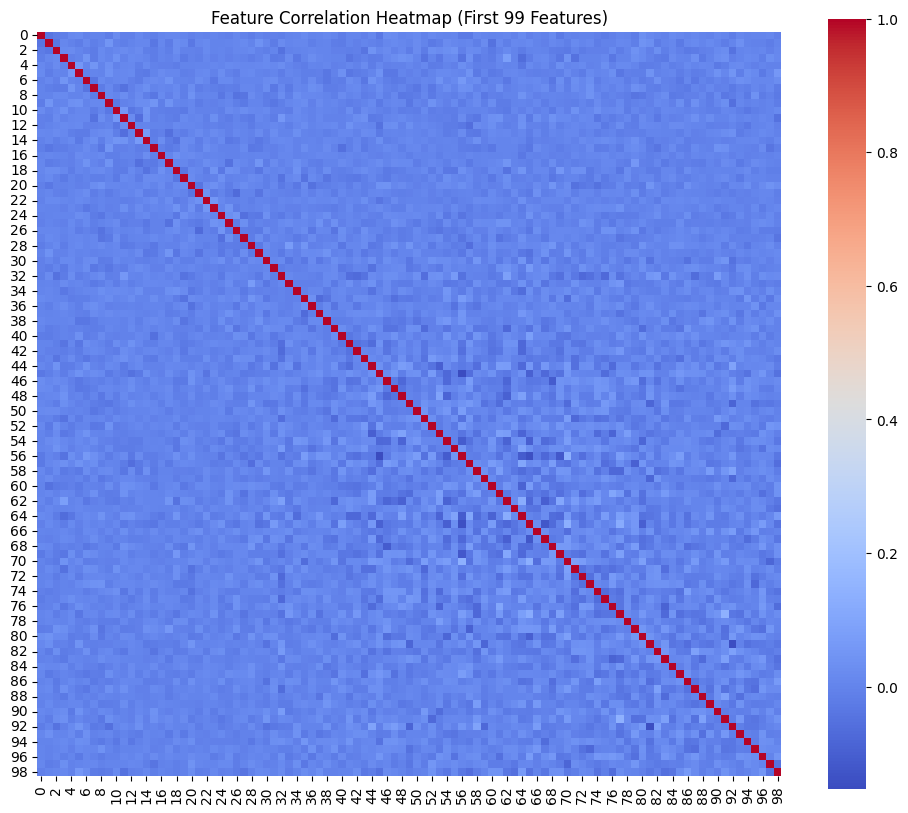

In [14]:
# this function plots a heatmap which shows the correlation in the dataset, we use this to understand the dataset better
def plot_heatmap_efficient(data, feature_subset=100, title="Feature Correlation Heatmap (Subset)"):
    """
    Plots a heatmap of the feature correlation matrix for a subset of features.

    Args:
        data (pd.DataFrame or np.ndarray): The dataset containing features.
        feature_subset (int): Number of features to include in the heatmap.
        title (str): Title of the heatmap.
    """
    if isinstance(data, np.ndarray):  # Convert to DataFrame if needed
        data = pd.DataFrame(data)

    # Compute the correlation matrix for the subset of features
    correlation_matrix = data.iloc[:, :feature_subset].corr()

    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, cmap="coolwarm", square=True, cbar=True)
    plt.title(title)
    plt.show()

# Example Usage
plot_heatmap_efficient(X_train, feature_subset=99, title="Feature Correlation Heatmap (First 99 Features)")



## Hyperparameter Tuning

### L2 Regularization


*   we need this type of regularization so that so we can penalize large weights in the loss function (which improves the model performance)



#### New Loss Function

In [15]:
# function that will return the total loss with MSE + the l2 penalty
def compute_loss_with_l2(y_pred, y_true, parameters, layers, l2_lambda):
    m = y_true.shape[0]  # Number of samples
    mse_loss = np.sum((y_pred - y_true.reshape(1, -1)) ** 2) / (2 * m)

    # Compute L2 penalty
    l2_penalty = sum(np.sum(parameters[f'W{l}'] ** 2) for l in range(1, len(layers)))
    l2_penalty *= (l2_lambda / (2 * m))

    return mse_loss + l2_penalty

#### Training with L2

In [16]:
# this function specifically trains the model with l2
def train_model_with_l2(X, y, layers, learning_rate=0.01, epochs=100, l2_lambda=0.01):
    """
    Train a neural network with L2 regularization
    """
    parameters = initialize_parameters(layers)

    for epoch in range(epochs):
        y_pred, cache = forward_propagation(X, parameters, layers)
        loss = compute_loss_with_l2(y_pred, y, parameters, layers, l2_lambda)
        grads = backward_propagation(parameters, cache, X, y, layers)

        # Add L2 regularization to gradients
        for l in range(1, len(layers)):
            grads[f'dW{l}'] += (l2_lambda / X.shape[0]) * parameters[f'W{l}']

        parameters = update_parameters(parameters, grads, learning_rate)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs}: Loss = {loss:.4f}")

    return parameters, loss

#### Log Experiment

In [17]:
# this function is what allows us to see the model's performance over time with the log (shows the changed parameters, R^2, etc)
def log_experiment(experiment_number, layers, learning_rate, l2_lambda, results):
    """
    Log experiment results to a CSV file.
    """
    import os

    log_file = "experiment_log.csv"
    experiment_data = {
        "Experiment Number": experiment_number,
        "Layers": str(layers),
        "Learning Rate": learning_rate,
        "L2 Lambda": l2_lambda,
        **results
    }

    # here we add the new information to the log file each time
    if os.path.exists(log_file):
        log_df = pd.read_csv(log_file)
        log_df = log_df.append(experiment_data, ignore_index=True)
    else:
        log_df = pd.DataFrame([experiment_data])

    log_df.to_csv(log_file, index=False)
    print(f"Experiment {experiment_number} logged successfully.")

### Run Experiment

In [18]:
# this shows how accurate our model is being
def calculate_accuracy(y_true, y_pred, tolerance=0.1):

    correct_predictions = np.abs(y_true - y_pred.flatten()) <= tolerance
    accuracy = np.mean(correct_predictions) * 100
    return accuracy

In [20]:
# this formats the tables of the log better
from IPython.display import display
import os

# this function has all the infromation that runs each experiment of the model with the features that are chosen
def run_experiment(
    experiment_number,
    layers,
    learning_rate=0.002,
    l2_lambda=0.01,
    epochs=100,
    train_test_split="75:25"
):

    # the information for this specific experiment
    print(f"\nRunning Experiment {experiment_number} with parameters:")
    print({
        "Neurons per layer": layers,
        "Learning Rate": learning_rate,
        "L2 Regularization (Lambda)": l2_lambda,
        "Epochs": epochs,
        "Train/Test Split": train_test_split
    })

    # here we are actually training the model
    trained_parameters = train_model(X_train, y_train, layers, learning_rate, epochs)

    # then we test the model
    y_test_pred, _ = forward_propagation(X_test, trained_parameters, layers)

    # then the metrics of how we analyze the performance of the model are computed
    MSE, RMSE, MAE, R2 = compute_metrics(y_test_pred, y_test)

    # then we log the results
    log = [
        {
            "Experiment Number": experiment_number,
            "Layers": str(layers),  # Ensure layers are logged as a string
            "Learning Rate": learning_rate,
            "L2 Lambda": l2_lambda,
            "MSE": MSE,
            "RMSE": RMSE,
            "MAE": MAE,
            "R²": R2
        }
    ]

    # save the log
    log_df = pd.DataFrame(log)

    if os.path.exists("experiment_log.csv"):
        existing_log_df = pd.read_csv("experiment_log.csv")

        # making sure there aren't any extra or duplicate columns
        if "Neurons per Layer" in existing_log_df.columns:
            existing_log_df = existing_log_df.drop(columns=["Neurons per Layer"], errors="ignore")

        log_df = pd.concat([existing_log_df, log_df], ignore_index=True)

    log_df.to_csv("experiment_log.csv", index=False)

    # showing the log in a tab format as specified in the project requirements
    print("\nUpdated Experiment Log:")
    display(log_df)

    # we then print the results
    print(f"\nExperiment {experiment_number} Results:")
    print(f"MSE: {MSE:.4f}")
    print(f"RMSE: {RMSE:.4f}")
    print(f"MAE: {MAE:.4f}")
    print(f"R² Score: {R2:.4f}")

run_experiment(
    experiment_number=12,
    layers=[100, 64, 32, 1],
    learning_rate=0.036,
    l2_lambda=0.01,
    epochs=150,
    train_test_split="80:20"
  )


Running Experiment 12 with parameters:
{'Neurons per layer': [100, 64, 32, 1], 'Learning Rate': 0.036, 'L2 Regularization (Lambda)': 0.01, 'Epochs': 150, 'Train/Test Split': '80:20'}
Epoch 1/150, Training Loss: 12.2199
Epoch 11/150, Training Loss: 7.2933
Epoch 21/150, Training Loss: 4.4940
Epoch 31/150, Training Loss: 2.2877
Epoch 41/150, Training Loss: 0.5220
Epoch 51/150, Training Loss: 0.2244
Epoch 61/150, Training Loss: 0.1568
Epoch 71/150, Training Loss: 0.1025
Epoch 81/150, Training Loss: 0.0705
Epoch 91/150, Training Loss: 0.0648
Epoch 101/150, Training Loss: 0.0699
Epoch 111/150, Training Loss: 0.0614
Epoch 121/150, Training Loss: 0.0530
Epoch 131/150, Training Loss: 0.0478
Epoch 141/150, Training Loss: 0.0439
Epoch 150/150, Training Loss: 0.0446

Updated Experiment Log:


,Experiment Number,Layers,Learning Rate,L2 Lambda,MSE,RMSE,MAE,R²
0,12,"[100, 64, 32, 1]",0.036,0.01,0.149301,0.386395,0.315706,0.704388



Experiment 12 Results:
MSE: 0.1493
RMSE: 0.3864
MAE: 0.3157
R² Score: 0.7044


#### Experiments

#### Log

In [21]:
# this actually displays the log file here (without needing to open the actual file)
log_df = pd.read_csv("experiment_log.csv")
display(log_df)

,Experiment Number,Layers,Learning Rate,L2 Lambda,MSE,RMSE,MAE,R²
0,12,"[100, 64, 32, 1]",0.036,0.01,0.149301,0.386395,0.315706,0.704388
